In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Extraction

In [38]:
vacancies = pd.read_csv("../scraping/vacancies.csv")
vacancies

,vacancy,company,experience,views,applications,salary,technologies
0,Python Engineer,Temy,3,19,3,NaN,"—,являються,цінуємо,для,обміну,сша,ефективност..."
1,Strong Junior Python Software Engineer,EVO,2,10,1,NaN,"—,розібратися,rust,izi.ua,допомогти,поки,соціа..."
2,Middle Infrastructure Engineer,SPD-Ukraine,3,4,1,NaN,"learnings,—,integrate,flolive,grpc,ukraine,gym..."
3,Senior Backend Engineer (Python+Go),Waverley software,5,1,0,NaN,"allowed,100,waverley,cross-functional,ukraine,..."
4,Senior Python,Ciklum International,5,0,0,NaN,"100,redefine,extraordinary,needed,cross-functi..."
...,...,...,...,...,...,...,...
302,Software Engineer (Python),SPS Commerce,3,91,27,NaN,"needed,decreasing,consistency,ukraine,fast,qua..."
303,Python Developer,Dataforest,1,421,81,$700-800,"in-memory,solve,great,flask,analysis,etl,insur..."
304,Senior Python Developer (Django),Idenon,5,56,8,NaN,"—,towards,ood,together,review,enthusiasts,indu..."
305,Application Engineer,UnameIT,1,346,19,$600-1200,"cross-functional,ukraine,level,skills,recruiti..."


# Data Cleaning & Wrangling for technologies

In [39]:
# get technologies frequency
exploded_technologies = vacancies["technologies"].str.split(",").explode() # for all vacancies
# exploded_technologies = vacancies[vacancies["experience"] == 5]["technologies"].str.split(",").explode() # vacancies in which 5 years of experience are required, you can change years of experience
technologies_dummies = pd.get_dummies(exploded_technologies)
technologies_frequency = technologies_dummies.sum().sort_values(ascending=False)
technologies_frequency

python           275
experience       247
team             228
development      223
years            206
                ... 
visualisation      1
bachelors          1
visions            1
visionary          1
🧳                  1
Length: 12277, dtype: int64

# Data Analysis & Visualization for technologies

<Axes: title={'center': 'Top 30 technologies on Djinni for Python Developer'}, xlabel='Technologies', ylabel='Number of mentions in vacancies'>

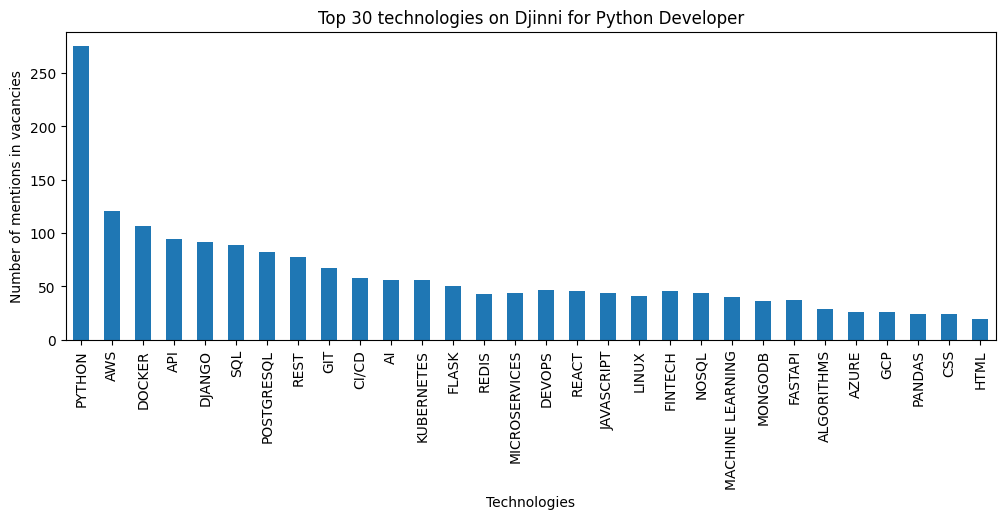

In [40]:
# visualizing top30 technologies by keyword frequency
top_technologies = np.array(["python", "aws", "docker", "api", "django", "sql", "postgresql", "rest", "git", "ci/cd", "ai", "kubernetes", "flask", "redis", "microservices", "devops", "react", "javascript", "linux", "fintech", "nosql", "machine", "mongodb", "fastapi", "algorithms", "azure", "gcp", "pandas", "css", "html"])
top30_technologies = technologies_frequency.reindex(top_technologies, fill_value=0)
top30_technologies = top30_technologies.rename(index={"machine": "machine learning"})
top30_technologies.index = top30_technologies.index.str.upper()
top30_technologies.plot.bar(
    figsize=(12,4),
    title="Top 30 technologies on Djinni for Python Developer",
    xlabel="Technologies",
    ylabel="Number of mentions in vacancies"
)

# Data Cleaning & Wrangling for salary

In [41]:
#get min, max salary and avg salary
vacancies["min_salary"] = vacancies["salary"].str.extract(r"\$?(\d+)")
vacancies["max_salary"] = vacancies["salary"].str.extract(r"(\d+)$")
vacancies_with_salary = vacancies.dropna(subset=["min_salary", "max_salary"]).copy()
vacancies_with_salary["min_salary"] = vacancies_with_salary["min_salary"].astype(np.int16)
vacancies_with_salary["max_salary"] = vacancies_with_salary["max_salary"].astype(np.int16)
vacancies_with_salary["avg_salary"] = ((vacancies_with_salary["min_salary"] + vacancies_with_salary["max_salary"]) / 2).astype(np.int16)
vacancies_with_salary[["min_salary", "max_salary", "avg_salary"]]

,min_salary,max_salary,avg_salary
12,1000,4000,2500
13,5000,6000,5500
15,3500,5000,4250
17,3000,3000,3000
19,4000,5500,4750
...,...,...,...
288,2500,2500,2500
290,500,1500,1000
291,4000,5500,4750
303,700,800,750


# Data Analysis & Visualization for salary, experience and other dependencies

<Axes: title={'center': 'Salary dependence on experience'}, xlabel='Experience', ylabel='Salary'>

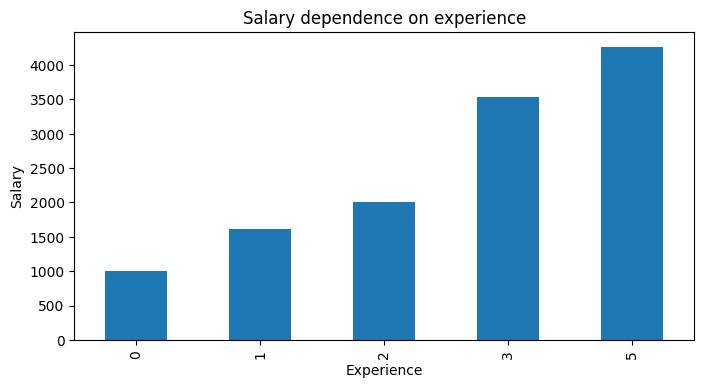

In [42]:
salary_experience = vacancies_with_salary.groupby("experience")["avg_salary"].mean()
salary_experience.plot.bar(xlabel="Experience", ylabel="Salary", figsize=(8,4), title="Salary dependence on experience")

<Axes: title={'center': 'Views dependence on salary'}, xlabel='Salary', ylabel='Views'>

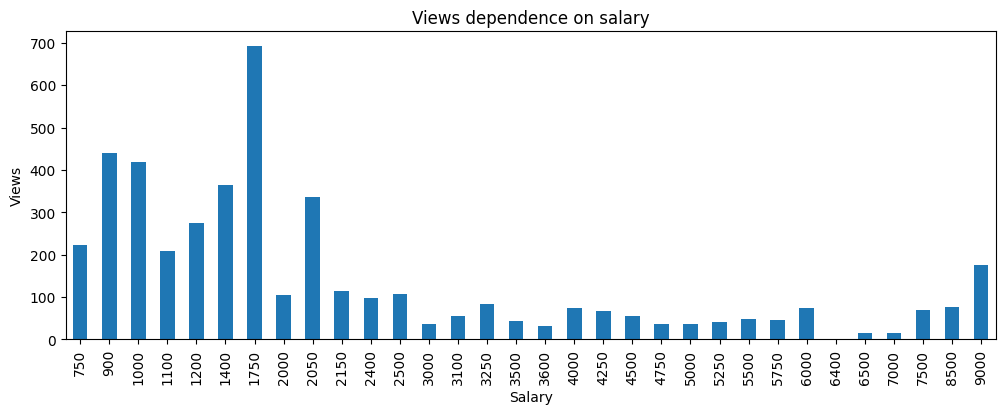

In [48]:
views_salary = vacancies_with_salary.groupby("avg_salary")["views"].mean()
views_salary.plot.bar(xlabel="Salary", ylabel="Views", figsize=(12,4), title="Views dependence on salary")

<Axes: title={'center': 'Applications dependence on salary'}, xlabel='Salary', ylabel='Applications'>

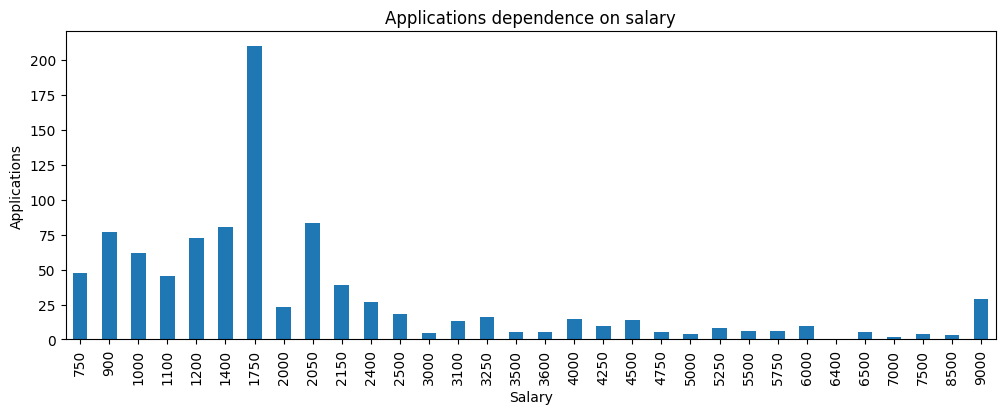

In [50]:
salary_applications = vacancies_with_salary.groupby("avg_salary")["applications"].mean()
salary_applications.plot.bar(xlabel="Salary", ylabel="Applications", figsize=(12,4), title="Applications dependence on salary")

<Axes: title={'center': 'Views dependence on experience'}, xlabel='Experience', ylabel='Views'>

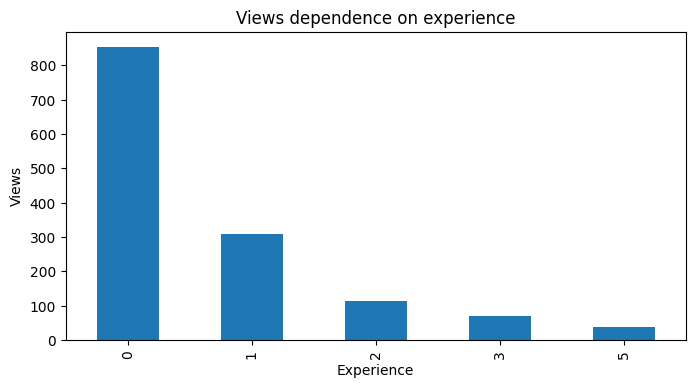

In [51]:
views_experience = vacancies.groupby("experience")["views"].mean()
views_experience.plot.bar(xlabel="Experience", ylabel="Views", figsize=(8,4), title="Views dependence on experience")

<Axes: title={'center': 'Applications dependence on experience'}, xlabel='Experience', ylabel='Applications'>

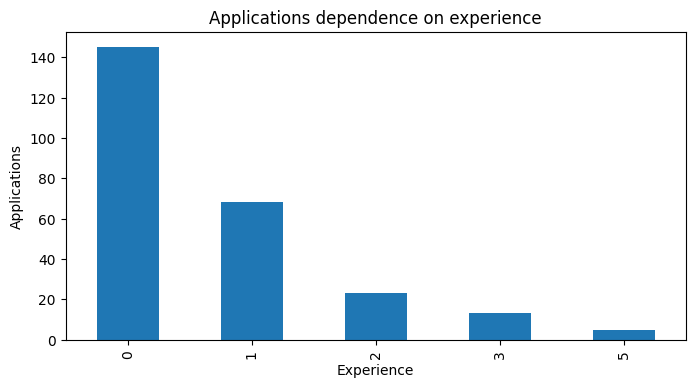

In [52]:
applications_experience = vacancies.groupby("experience")["applications"].mean()
applications_experience.plot.bar(xlabel="Experience", ylabel="Applications", figsize=(8,4), title="Applications dependence on experience")

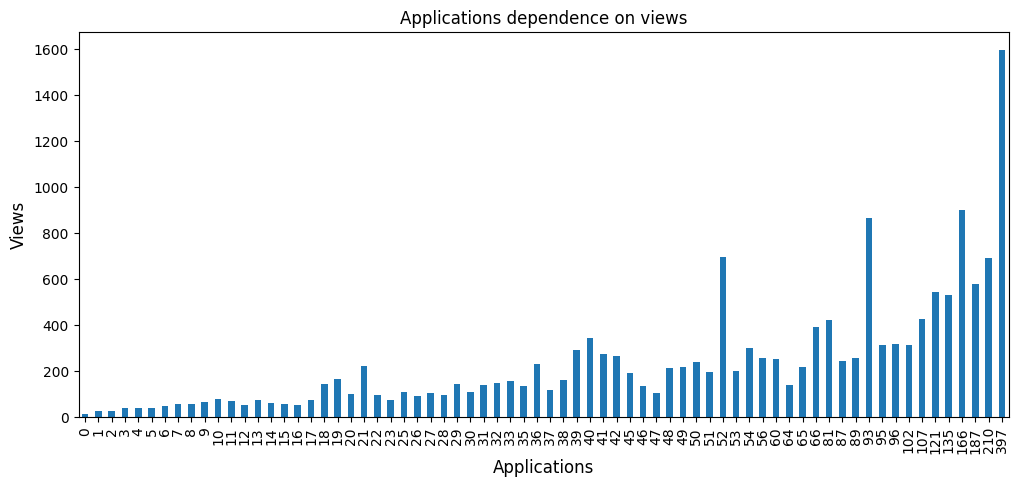

In [56]:
views_applications = vacancies.groupby("applications")["views"].mean()
views_applications.plot.bar(figsize=(12,5), title="Applications dependence on views")
plt.xlabel("Applications", fontsize=12)
plt.ylabel("Views", fontsize=12)
plt.show()